## Regression Problem

In [2]:
import pandas as pd
import numpy as np

### Upload the File from external folder

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Average Temperature 1900-2023.csv to Average Temperature 1900-2023.csv


In [5]:
import io
Temp_df=  pd.read_csv(io.BytesIO(uploaded['Average Temperature 1900-2023.csv']))

In [6]:
Temp_df.isnull().sum()

Year                              0
Average_Fahrenheit_Temperature    0
dtype: int64

In [7]:
Temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            124 non-null    int64  
 1   Average_Fahrenheit_Temperature  124 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


In [8]:
Temp_df.head()

,Year,Average_Fahrenheit_Temperature
0,1900,53.9
1,1901,53.5
2,1902,52.1
3,1903,50.6
4,1904,51.8


In [9]:
Temp_df.columns

Index(['Year', 'Average_Fahrenheit_Temperature'], dtype='object')

In [10]:
y =Temp_df['Average_Fahrenheit_Temperature']
x = Temp_df[['Year']]

In [11]:
print(y)

0      53.9
1      53.5
2      52.1
3      50.6
4      51.8
       ... 
119    53.5
120    53.1
121    54.5
122    54.0
123    53.9
Name: Average_Fahrenheit_Temperature, Length: 124, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [14]:
x_train.head()

,Year
3,1903
32,1932
94,1994
108,2008
4,1904


## Model Train

In [15]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()

In [16]:
Model.fit(x_train, y_train)

LinearRegression()

In [17]:
Model.intercept_

8.184885694108871

In [18]:
Model.coef_

array([0.02245328])

In [19]:
Predicted_value = Model.predict(x_test)

In [20]:
Predicted_value

array([51.90142982, 53.04654731, 51.99124295, 53.54051956, 53.33844   ,
       52.14841594, 52.39540207, 52.37294878, 51.63199041, 51.76671011,
       51.11556487, 51.04820502, 51.60953712, 51.65444369, 52.32804222,
       52.88937432, 52.75465461, 51.13801816, 52.05860281, 51.96878967,
       51.31764443, 52.82201447, 53.58542612, 51.67689698, 52.41785535,
       52.97918745, 52.7771079 , 51.16047144, 51.72180354, 53.02409402,
       52.86692103])

## Accurany Of Model

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_test, Predicted_value)

In [22]:
error

0.01676291947597988

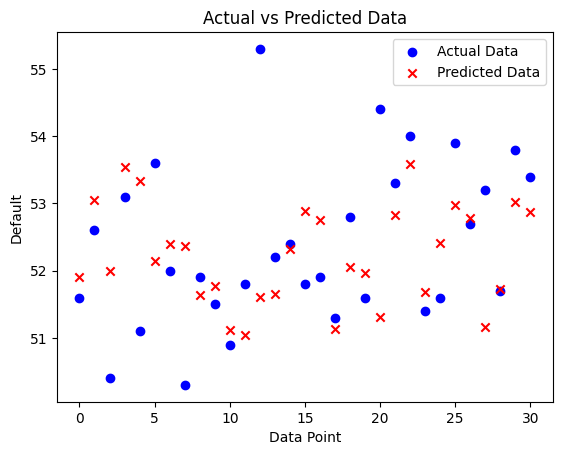

In [24]:
import matplotlib.pyplot as plt

# Plotting the actual values
plt.scatter(range(len(y_test)), y_test, label='Actual Data', color='blue', marker='o')

# Plotting the predicted values
plt.scatter(range(len(Predicted_value)), Predicted_value, label='Predicted Data', color='red', marker='x')

# Add labels and a title
plt.xlabel('Data Point')
plt.ylabel('Default')
plt.title('Actual vs Predicted Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


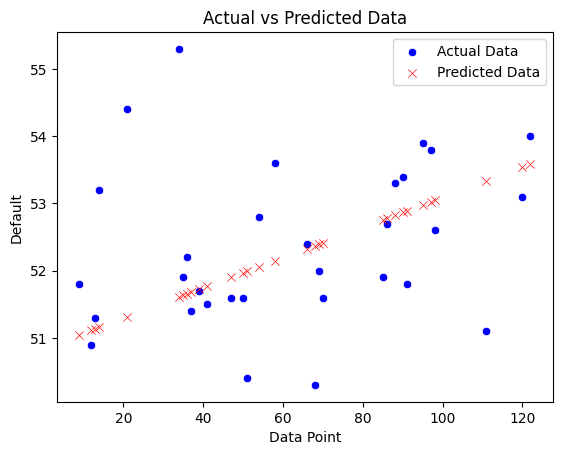

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the data
import pandas as pd
data = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': Predicted_value})

# Plotting the actual values
sns.scatterplot(data=data, x=data.index, y='Actual Data', label='Actual Data', color='blue', marker='o')

# Plotting the predicted values
sns.scatterplot(data=data, x=data.index, y='Predicted Data', label='Predicted Data', color='red', marker='x')

# Add labels and a title
plt.xlabel('Data Point')
plt.ylabel('Default')
plt.title('Actual vs Predicted Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [30]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for the data
data = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': Predicted_value})

# Plotting the actual and predicted values using Plotly Express
fig = px.scatter(data, x=data.index, y=['Actual Data', 'Predicted Data'],
                 labels={'value': 'Default', 'index': 'Data Point'},
                 color_discrete_map={'Actual Data': 'blue', 'Predicted Data': 'red'},
                 title='Actual vs Predicted Data',
                 )

# Show the plot
fig.show()
